# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

In [40]:
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [8]:
def explore_data(df):
    # this function applies many exploratory techniques to a given dataframe
    display("Head",
            df.head()
            .style
            .background_gradient(cmap='Blues')
           )
    display("Data Types",
            df.dtypes
            .to_frame()
           )
    display("Data Types Count",
            df.dtypes
            .to_frame()[0]
            .value_counts()
            .to_frame()
           )
    display("Nan Values per Column",
            df.isna()
            .sum()
            .to_frame()
            .sort_values(by=[0], ascending=False)
           )
    display("Descriptive Statistics",
            df.describe()
           )
    display("Correlation Matrix",
            df.corr()
            .style.background_gradient(cmap='coolwarm')
            .set_precision(2)
           )

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 

In [12]:
boston = load_boston()
X = boston.data
y = boston.target
data = pd.DataFrame (boston.data)
data['MEDV'] = boston.target
data.columns = list(boston.feature_names) + ['MEDV']

In [10]:
explore_data(data)

'Head'

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.9,5.33,36.2


'Data Types'

,0
CRIM,float64
ZN,float64
INDUS,float64
CHAS,float64
NOX,float64
RM,float64
AGE,float64
DIS,float64
RAD,float64
TAX,float64


'Data Types Count'

,0
float64,14


'Nan Values per Column'

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


'Descriptive Statistics'

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


'Correlation Matrix'

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1,-0.2,0.41,-0.056,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.2,1,-0.53,-0.043,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1,0.063,0.76,-0.39,0.64,-0.71,0.6,0.72,0.38,-0.36,0.6,-0.48
CHAS,-0.056,-0.043,0.063,1,0.091,0.091,0.087,-0.099,-0.0074,-0.036,-0.12,0.049,-0.054,0.18
NOX,0.42,-0.52,0.76,0.091,1,-0.3,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.091,-0.3,1,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.7
AGE,0.35,-0.57,0.64,0.087,0.73,-0.24,1,-0.75,0.46,0.51,0.26,-0.27,0.6,-0.38
DIS,-0.38,0.66,-0.71,-0.099,-0.77,0.21,-0.75,1,-0.49,-0.53,-0.23,0.29,-0.5,0.25
RAD,0.63,-0.31,0.6,-0.0074,0.61,-0.21,0.46,-0.49,1,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.036,0.67,-0.29,0.51,-0.53,0.91,1,0.46,-0.44,0.54,-0.47


In [13]:
### Usefull according to correlation
# RM - average number of rooms per dwelling
# ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
# DIS - weighted distances to five Boston employment centres
# B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

### Next, we want to explore the data. Pick several varibables you think will be ost correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

In [47]:
y = data['MEDV'] 
XRM = data['RM'] 
XZN = data['ZN'] 
XDIS = data['DIS'] 
XB =data['B']

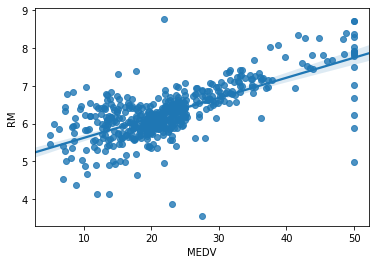

In [48]:
sns.regplot(y, XRM)

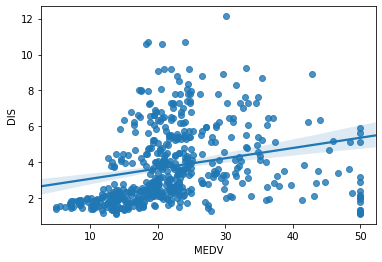

In [50]:
sns.regplot(y, XDIS)

### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

In [52]:
#The amount of rooms has an influence on the house prices. 
#The distrance to the employment centres have a influence, the further away the cheaper. 


In [ ]:
#yes this what I've expected. 

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

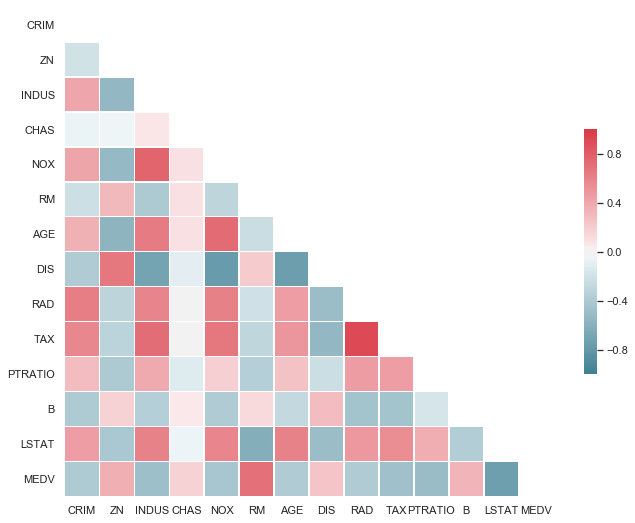

In [53]:
sns.set(style="white")

corr = data.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmin= -1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
###No while I used the heatmap to base my desicsion on. 

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [54]:
#See above. 

----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [57]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    r2 = r2_score(y_true, y_pred)
    return print('The R2-score is', r2)

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [67]:
XRM_train, XRM_test, y_train, y_test = train_test_split(XRM, y, test_size=0.25, random_state = 29)
XDIS_train, XDIS_test, y_train, y_test = train_test_split(XDIS, y, test_size=0.25, random_state = 29)

----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

In [59]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [61]:
# Five separate RFR here with the given max depths
parameters = [2, 4, 6, 8 ,10]

In [81]:
for p in parameters:
    XRM_train, y_train = make_regression(n_features=4, n_informative=2, random_state=0, shuffle=False)
    regr = RandomForestRegressor(max_depth=p, random_state=0)
    regr.fit(XRM_train, y_train)
    print(regr.feature_importances_)

[0.17339552 0.81594114 0.         0.01066333]
[0.22216259 0.75637223 0.0021884  0.01927678]
[0.23105252 0.74221107 0.00367433 0.02306208]
[0.23394363 0.73960454 0.00515065 0.02130118]
[0.23279836 0.74011131 0.00517804 0.0219123 ]


C:\Users\eveli\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\eveli\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\eveli\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\eveli\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\eveli\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

In [84]:
for p in parameters:
    XRM_test, y_test = make_regression(n_features=4, n_informative=2, random_state=0, shuffle=False)
    regr = RandomForestRegressor(max_depth=p, random_state=0)
    regr.fit(XRM_test, y_test)
    print(regr.feature_importances_)

[0.17339552 0.81594114 0.         0.01066333]
[0.22216259 0.75637223 0.0021884  0.01927678]
[0.23105252 0.74221107 0.00367433 0.02306208]
[0.23394363 0.73960454 0.00515065 0.02130118]
[0.23279836 0.74011131 0.00517804 0.0219123 ]


C:\Users\eveli\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\eveli\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\eveli\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\eveli\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\eveli\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

Now, plot the score for each tree on the training set and on the testing set.

What do these results tell you about the effect of the depth of the trees on the performance of the model?

In [ ]:
# If I look at the results they are the same, so the depth doesn't matter. 

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10?

In [ ]:
# it suffers from high variance if the depth is high it suffers from high bias is the depth is low. 

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

In [85]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

In [95]:
def rfr_model(X, y):
# Perform Grid-Search
    gsc = GridSearchCV(
        estimator=RandomForestRegressor(),
        param_grid={
            'max_depth': range(2,10,2),
            'n_estimators': (10, 50, 100, 1000),
        },
        cv=5, scoring='neg_mean_squared_error', verbose=0,                         n_jobs=-1)
    
    grid_result = gsc.fit(X, y)
    best_params = grid_result.best_params_
    
    rfr = RandomForestRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"],                               random_state=False, verbose=False)
    scores = cross_val_score(rfr, X, y, cv=10, scoring='neg_mean_absolute_error')

    return scores

train = rfr_model(XRM_train, y_train)
print(train)

test = rfr_model(XRM_test, y_test)
print(test)


[-11.01504273  -6.91658749 -12.07415627  -7.29010254  -5.2677958
  -5.28449274  -6.22087155  -8.50759458  -6.55657865  -5.77965097]
[-10.38871696  -6.3319074  -12.41751722  -6.71191217  -4.71893484
  -5.23805095  -6.3263342   -8.43553432  -5.76697706  -5.49072738]


In [ ]:
###I have no clue how to read these results.

### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [ ]:
# depends of how the housing market is going
# they are but also a bit racist 
# No, it should be updated with new data
# No, urban and rural is to different. 